### Продвинутый Pandas и визуализация на Python

1. Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [325]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Воспользуемся методом split 

In [326]:
names = 'Name1 Surname1, Name2 Surname2'

In [327]:
names

'Name1 Surname1, Name2 Surname2'

In [328]:
names_list = names.split(', ')

In [329]:
names_list

['Name1 Surname1', 'Name2 Surname2']

2. В переменной df содержатся необходимые данные. Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35. Поместите результат в переменную medium_35

Создадим df для работы

In [330]:
df = pd.DataFrame ({'client_id': [9002, 6722, 8799, 8737, 5208], 'sex': [1, 1, 1, 0, 0], 'wealth': ['medium', 'high', 'high', 'low', 'medium'], 'age': [63, 54, 62, 54, 37]})        

In [331]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


С помощью функции query отберём нужных пользователей и запишем их в новую переменную

In [332]:
medium_35 = df.query("wealth == 'medium' and age > 35")

In [333]:
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


3. Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:

In [334]:
df =df.rename(columns= {'client_id': 'Клиент id', 'sex': 'Пол', 'wealth': 'Благосостояние', 'age': 'Возраст'})

In [335]:
df

,Клиент id,Пол,Благосостояние,Возраст
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [336]:
df =df.rename(columns= {'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'})

In [337]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


4. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)

Добавим новую колонку, результат которой будет ответ, старше ли клиент 30-ти

In [338]:
df['older_than_30'] = df.age > 30

In [339]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


5. А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

Посмотрим на количество уникальных значений в каждой колонке и запишем в переменную unique_num

In [340]:
unique_num = df.nunique()

In [341]:
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

6. У нас появились новые данные! Переменная data хранит в себе датафрэйм.

Зададим новый df

In [342]:
data = pd.DataFrame ({'client_id': [5392, 9581, 7250, 8619, 6573], 'amount': [42331, 88420, 1714, 80572, 57549], 'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]})

In [343]:
data

,client_id,amount,date
0,5392,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data.

Объединим два дата фрейма по inner join

In [344]:
full_data = df.merge(data, on= 'client_id', how ='inner')

7. 💀 Сложное задание! 💀

Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу
считывает переданный файл, в котором разделителем является ;
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
возвращает результат этих действий (агрегированный датафрэйм)

P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.

Напишем функцию, которая считывает файл, группирует данные по компаниям и считает средний заработок каждой

На выходе получаем дата фрейм

In [345]:
def read_n_agg (path_to_file):
    df = pd.read_csv(path_to_file, sep = ';')
    df = df.groupby('company').agg({'income': 'mean'})
    return df    

Проверяем функцию: пишем её название, в скобки помещаем путь

In [346]:
read_n_agg ('https://raw.githubusercontent.com/Vlkoz/Advanced_python_and_visualisation/main/files/3_companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


 8. Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей.

* journey_id – уникальный id поездки
* user_id – id пользователя
* driver_id – id водителя
* taxi_id – id машины
* icon – тип поездки
* start_type – тип заказа (asap, reserved, delayed)
* start_at – время начала поездки
* start_lat – исходное местоположение пользователя, широта
* start_lon – исходное местоположение пользователя, долгота
* end_at – время окончания поездки
* end_lat – итоговое местоположение, широта
* end_lon – итоговое местоположение, долгота
* end_state – состояние заказа
* driver_start_lat – исходное местоположение водителя, широта
* driver_start_lon – исходное местоположение водителя, долгота
* arrived_at – время прибытия водителя
* source – платформа, с которой сделан заказ
* driver_score – оценка водителя клиентом
* rider_score – оценка клиента водителем
 

Импортируйте pandas как pd.  
Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.

In [347]:
path_to_file = 'https://raw.githubusercontent.com/Vlkoz/Advanced_python_and_visualisation/main/files/3_taxi_peru.csv'

In [348]:
taxi = pd.read_csv(path_to_file, parse_dates=['start_at', 'end_at', 'arrived_at'], sep = ';')

In [349]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


9. Проверьте, с какой платформы было сделано больше всего заказов? В ответе укажите значение в %, округлённое до целого.

Найдём общее количество устройств

In [350]:
taxi.source.value_counts().sum()

22988

Посмотрим количество устройств по типу OC

In [351]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

Разделим общее количество устройств на устройства с типом ОС iPhone

In [352]:
9741/22988 * 100

42.374282234209154

Округлим получившееся значение с помощью round

In [353]:
round(42.374282234209154, 0)

42.0

10. Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

Какой график получился?

Выведем таблицу с количеством заказов по каждой ОС, запишем в переменную type_OC

In [354]:
type_OC = taxi.groupby('source', as_index= False) \
    .agg({'end_lat': 'count'}) \
    .sort_values('end_lat', ascending = False) \
    .rename(columns = {'end_lat': 'amount'})

Построим барплот

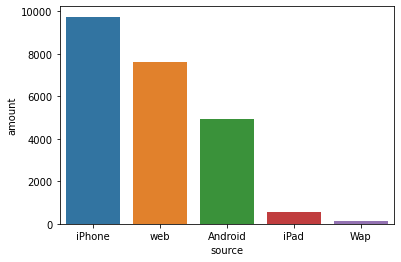

In [355]:
sns.barplot(x= 'source', y= 'amount', data =type_OC)

11. Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно. Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

Построим график, указав только df и колонку

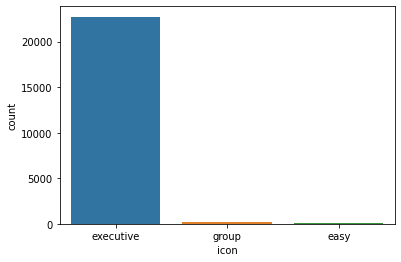

In [356]:
sns.countplot(x= 'icon',data = taxi)

Тип поездки executive встречался чаще всего.

12. Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:


* Посчитайте частоту встречаемости каждой из оценок
* Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
* Сбросьте индексы
* Переименуйте колонки в driver_score и percentage
* Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
* Запишите результат в driver_score_counts
 

Полезные функции:

* mul() – умножение, более удобный вариант для использования в цепочке методов 
* round() – округление
* reset_index() – сбросить индекс
* value_counts() – сколько раз встречается каждое значение переменной
 

Сгруппируем данные по оценкам водителей

Посчитаем количество по каждой из оценок

Переименуем колонку на amount

In [357]:
driver_score = taxi.groupby('driver_score', as_index= False) \
    .agg({'user_id':'count'}) \
    .rename (columns = {'user_id': 'amount'})

В переменную scores запишем удельный процент каждой оценки, это достигается благодаря параметру normalize

In [358]:
scores = taxi.driver_score.value_counts(normalize = True).mul(100).round(2)

In [359]:
scores

5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

Сбросим индексы

In [360]:
scores = scores.reset_index()

In [361]:
scores

,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


Переименуем колонки

In [362]:
scores = scores.rename(columns = {'driver_score': 'percentage', 'index': 'driver_score'  })

Отсортируем по возрастанию по оценке

In [363]:
driver_score_counts = scores.sort_values('driver_score')

In [364]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


13. Теперь строим график!
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получился график:


* ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
* ax.set(xlabel='Driver score', ylabel='Percentage')
* sns.despine()  # убрать часть рамки графика
* plt.show()


Чтобы получился график, необходимо в первой строке поместить в кавычки driver_score и percentage.

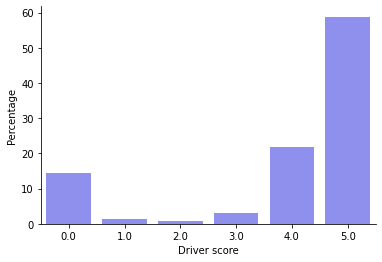

In [365]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() 
plt.show()

14. 💀 Сложное задание! 💀

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?

Сделаем аналогично прошлому заданию

In [366]:
rider_score = taxi.groupby('rider_score', as_index= False) \
    .agg({'user_id':'count'}) \
    .rename (columns = {'user_id': 'amount'})

In [367]:
rider_score

,rider_score,amount
0,0.0,352
1,1.0,32
2,2.0,30
3,3.0,213
4,4.0,1359
5,5.0,13404


In [368]:
scores_r =taxi.rider_score.value_counts(normalize = True).mul(100).round(2)

In [369]:
scores_r

5.0    87.10
4.0     8.83
0.0     2.29
3.0     1.38
1.0     0.21
2.0     0.19
Name: rider_score, dtype: float64

In [370]:
scores_r = scores_r.reset_index()

In [371]:
scores_r

,index,rider_score
0,5.0,87.10
1,4.0,8.83
2,0.0,2.29
3,3.0,1.38
4,1.0,0.21
5,2.0,0.19


In [372]:
scores_r = scores_r.rename(columns = {'rider_score': 'percentage', 'index': 'rider_score'  })

In [373]:
scores_r

,rider_score,percentage
0,5.0,87.10
1,4.0,8.83
2,0.0,2.29
3,3.0,1.38
4,1.0,0.21
5,2.0,0.19


In [374]:
rider_score_counts = scores_r.sort_values('rider_score')

In [375]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


Создадим график для оценки водителей

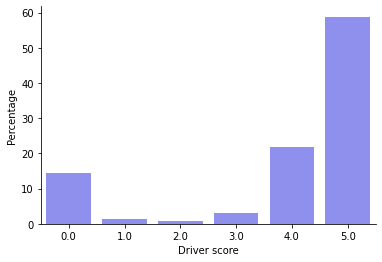

In [376]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  
plt.show()

Создадим график для оценки пассажиров

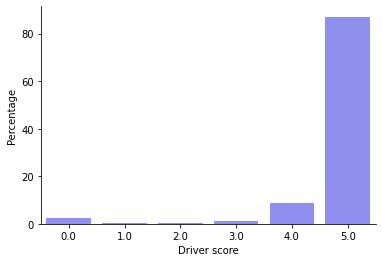

In [377]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  
plt.show()

15. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. Вопрос: Сколько уникальных значений принимает переменная platform?

In [378]:
user_data = pd.read_csv('https://raw.githubusercontent.com/Vlkoz/Advanced_python_and_visualisation/main/files/user_data.csv')

In [379]:
logs = pd.read_csv('https://raw.githubusercontent.com/Vlkoz/Advanced_python_and_visualisation/main/files/logs.csv')

Посмотрим на размеры таблиц

In [380]:
user_data.shape

(2954, 3)

In [381]:
logs.shape

(4500, 4)

Посмотрим на типы данных в обоих таблицах

In [382]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [383]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

Посмотрим на описательную статистику таблиц

In [384]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [385]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Посмотрим количество уникальных платформ

In [386]:
logs.platform.nunique()

3

16. Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

Сгруппируем по клиенту

Отсортируем по клиенту и количеству успешных заказов, по количеству заказов: по убыванию, по клиентам: по возрастанию

Выведем первые 10 строк

In [387]:
max_succ =  logs.groupby('client', as_index= False) \
    .agg({'success': 'sum'}) \
    .sort_values(['success', 'client'], ascending = [False, True] ) \
    .head(10)

17. С какой платформы осуществляется наибольшее количество успешных операций?

In [388]:
logs.groupby('platform', as_index = False) \
    .agg({'success': 'sum'})

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


18. Какая платформа наиболее популярна среди премиумных клиентов?

Смёрджим два дата фрейма по ключу 'client'

In [389]:
full_df =user_data.merge(logs, on = 'client')

Сгруппируем по платформе и посчитаем количество премиум клиентов

In [390]:
type_platform = full_df.groupby('platform', as_index = False) \
    .agg({'premium': 'sum'})

In [391]:
type_platform

,platform,premium
0,computer,150
1,phone,246
2,tablet,24


19. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате? Используйте датасэт, который вы получили на предыдущем шаге

С объединённого df возьмём две нужные нам колонки

Запишем в переменную client_type

In [392]:
client_type = full_df[['premium', 'age']]

In [393]:
client_type

,premium,age
0,False,58
1,False,55
2,False,64
3,False,44
4,False,49
...,...,...
3434,False,29
3435,False,50
3436,True,64
3437,False,46


Построим график с наложением

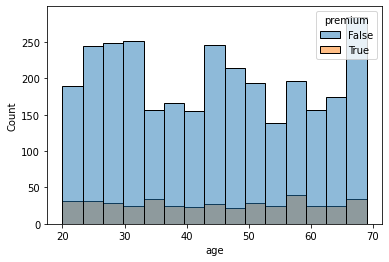

In [394]:
sns.histplot(data=client_type, x="age", hue="premium")

20. Постройте график распределения числа успешных операций: 


* x – число успешных операций 
* y – число клиентов, совершивших столько успешных операций

Отберём только успешные операции

Сгруппируем по клиентам

Посчитаем количество успешных операций по каждому клиенту

In [395]:
client_success = full_df.query("success == True") \
    .groupby('client') \
    .agg({'success': 'count'})

На основании полученных данных создадим график

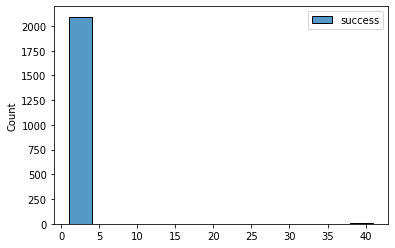

In [396]:
sns.histplot(client_success, kde=False)

21. ⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

* sns.countplot – документация к типу графика
* figsize – про размер графиков

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

Отберём успешные операции, сделанные на компьютере, запишем в новую переменную

In [397]:
comp_age = full_df.query("platform == 'computer' and success == True")

Увеличим масштаб

Построим countplot, распределение будет по возрасту, поэтому передадим в переменную x 'age'

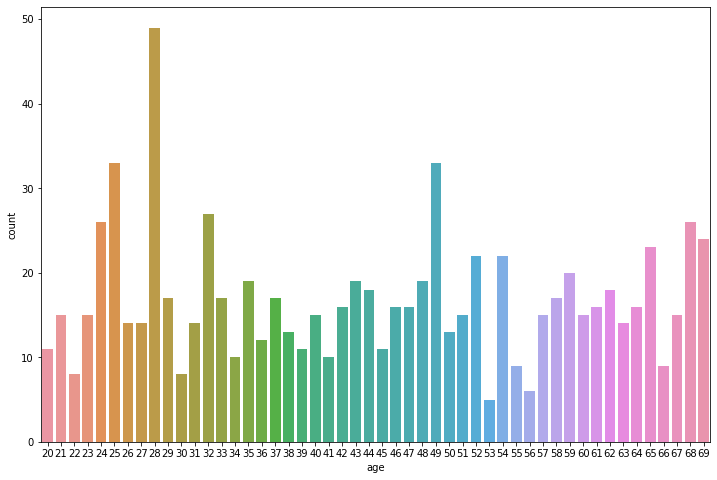

In [398]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="age",  data=comp_age)

Таким образом, клиенты которым 28 лет совершили наибольшее число успешных операций.